In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
Data=pd.read_csv('data/spambase_2.csv')

In [3]:
Ydata=Data.iloc[:,-1]
Ydata.describe()

count    2836.000000
mean        0.017278
std         0.130328
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 1, dtype: float64

In [4]:
Xdata=Data.iloc[:,0:56]
Xdata['Intercept']=1

In [5]:
def prob(X,W):
    return np.exp(X@W)/(1+np.exp(X@W))

In [6]:
def NLogL(X,Y,W,l):
    g,l=Y.shape
    return (-np.sum(-np.log(1+np.exp(X@W))+np.multiply(Y,X@W))-np.sum(l*W**2))/g

In [7]:
def der1(X,Y,W,p):
    return -(X.T@(Y-p)+2*l*W)

In [8]:
def opt(x_train,y_train, x_test, y_test,l):
    W=np.zeros((k,1))
    Cost_train=[]
    Cost_test=[]
    for i in range(max_iteration):
        p=prob(x_train,W)
        Cost_train.append(NLogL(x_train,y_train,W,l))
        Cost_test.append(NLogL(x_test,y_test,W,l))
        dW=der1(x_train,y_train,W,p)
        W=W-alpha*dW
    return Cost_train,Cost_test, W
    

In [9]:
max_iteration=10000
alpha=0.000001
X=Xdata.as_matrix()
Y=Ydata.as_matrix()
m,k=X.shape
Y=Y.reshape(m,1)
x_train, x_test, y_train, y_test=train_test_split(X, Y, train_size=0.8)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


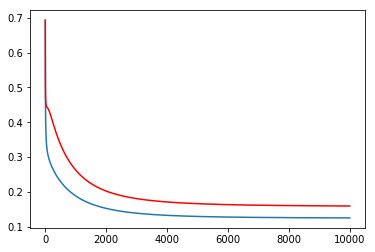

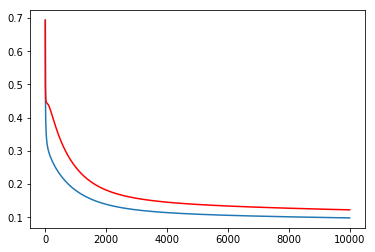

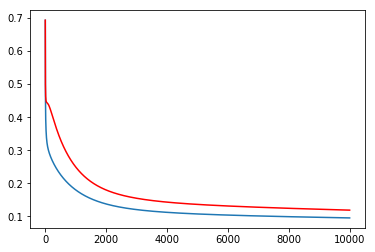

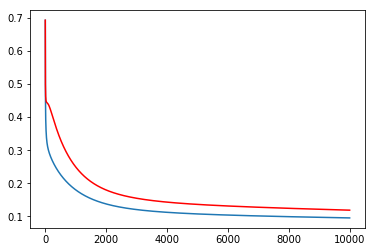

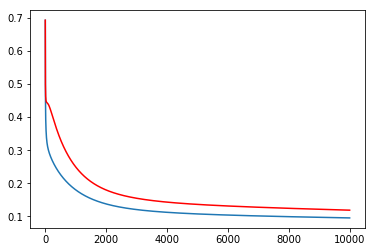

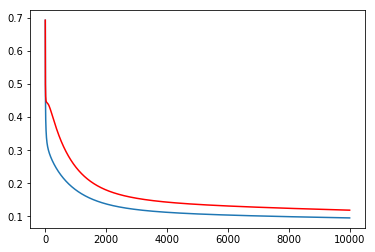

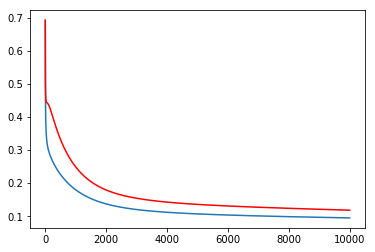

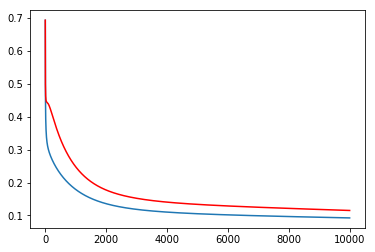

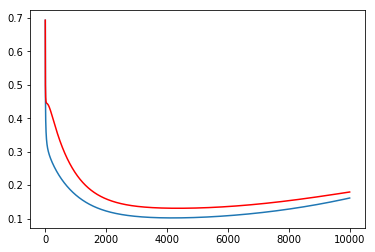

In [10]:
for l in [-100,-10,-1,-0.1,0,0.1,1,10,100]:
    Cost_train,Cost_test, W=opt(x_train,y_train, x_test, y_test,l)
    plt.plot(Cost_train) 
    plt.plot(Cost_test, color='red')
    plt.pause(0.1)